In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp

from scipy.stats import norm

In [311]:
# Data is loaded in df. dataDir tell us folder of file.

dataDir = "../Data/Reims/"
df = pd.read_csv(dataDir + "170830-noheader.csv")

C:\Users\Matej\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [312]:
# Data in list are unuseful so we can delete them. ALso data from CH21 to CH40 are unuseful.

list_unused = ["Logic", "Alarm1-10", "Alarm11-20", "Alarm21-30", "Alarm31-40", "AlarmLP", "AlarmOut"]

for element in list_unused:
    df.drop(element, 1, inplace=True)
    
for i in range(21, 41):
    df.drop("CH" + str(i), 1, inplace=True)

# In firs line we have units. We can delete them. 
df.drop(0, 0, inplace=True)

In [313]:
# Converting string to float.
df["ms"] = pd.to_numeric(df["ms"])

for i in range(1, 21):
    df["CH" + str(i)] = pd.to_numeric(df["CH" + str(i)])

In [314]:
# Converting time and apending milliseconds.
df["Date&Time"] = pd.to_datetime(df["Date&Time"], format="%Y-%m-%d %H:%M:%S")
df["Date&Time"] = pd.to_datetime(((df["Date&Time"].astype (np.int64) / 1000000).astype (np.int64) + df["ms"]), unit="ms")


In [315]:
df2 = pd.DataFrame(df).copy(deep=True)

In [316]:
n=1
while n != 21:
    j = str(n)
    df['CH' + j] = df['CH' + j][:60] 
    n += 1

df['ms'] = df['ms'][:60]

In [317]:
df.describe()

,ms,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,250.000000,22.823333,21.710000,32030.466667,64290.366667,-2.223333,61.712167,-0.073167,0.515000,-0.591667,43.659667,1.79000,6.735000,16.080000,2.491667,23.876500,0.390000,3.935000,0.573333,2.070000,0.066833
std,252.109742,0.074485,0.030253,7496.988533,12527.537997,6.264275,49.201138,0.006507,0.075521,0.272024,9.820206,0.28742,0.079883,0.068396,0.069603,0.006846,0.060226,4.191712,0.044595,0.074333,0.008924
min,0.000000,22.700000,21.700000,-65.000000,-121.000000,-18.300000,-0.190000,-0.090000,0.400000,-1.100000,28.180000,1.30000,6.600000,15.900000,2.400000,23.860000,0.300000,1.600000,0.500000,2.000000,0.050000
25%,0.000000,22.800000,21.700000,27128.750000,62010.500000,0.500000,-0.170000,-0.080000,0.500000,-0.800000,28.267500,1.57500,6.700000,16.000000,2.400000,23.880000,0.400000,1.700000,0.500000,2.000000,0.060000
50%,250.000000,22.800000,21.700000,36542.000000,69081.000000,0.750000,100.180000,-0.070000,0.500000,-0.500000,49.920000,1.70000,6.700000,16.100000,2.500000,23.880000,0.400000,1.700000,0.600000,2.100000,0.065000
75%,500.000000,22.825000,21.700000,36542.000000,69083.000000,1.000000,100.180000,-0.070000,0.600000,-0.400000,49.920000,2.10000,6.800000,16.100000,2.500000,23.880000,0.400000,2.400000,0.600000,2.100000,0.070000
max,500.000000,23.000000,21.800000,36544.000000,69083.000000,1.400000,100.180000,-0.060000,0.700000,-0.200000,49.950000,2.20000,6.900000,16.200000,2.700000,23.880000,0.500000,14.000000,0.600000,2.200000,0.080000


In [318]:
df.set_index('Date&Time')

,Number,ms,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20
Date&Time,,,,,,,,,,,,,,,,,,,,,,
2017-08-30 04:36:30.000,1,0.0,22.8,21.7,-65.0,-121.0,-11.9,-0.12,-0.07,0.5,-0.9,49.92,1.7,6.7,16.1,2.5,23.87,0.4,1.7,0.6,2.1,0.07
2017-08-30 04:36:30.500,2,500.0,22.8,21.7,-65.0,-121.0,-15.6,-0.12,-0.07,0.4,-0.9,49.92,2.1,6.9,16.1,2.5,23.88,0.5,1.6,0.6,2.1,0.07
2017-08-30 04:36:31.000,3,0.0,22.9,21.7,36544.0,69083.0,-14.9,100.18,-0.07,0.4,-1.1,49.93,2.1,6.8,16.1,2.5,23.88,0.4,1.6,0.5,2.1,0.06
2017-08-30 04:36:31.500,4,500.0,22.7,21.7,36542.0,69083.0,-18.3,100.18,-0.07,0.5,-0.9,49.93,2.1,6.8,16.1,2.6,23.88,0.4,1.7,0.5,2.1,0.07
2017-08-30 04:36:32.000,5,0.0,22.8,21.7,36543.0,69083.0,-13.7,100.18,-0.07,0.5,-0.9,49.94,2.1,6.8,16.2,2.5,23.88,0.4,1.6,0.5,2.1,0.08
2017-08-30 04:36:32.500,6,500.0,22.8,21.7,36542.0,69083.0,-14.3,100.17,-0.08,0.5,-0.8,49.94,2.2,6.9,16.1,2.5,23.86,0.3,1.6,0.6,2.1,0.06
2017-08-30 04:36:33.000,7,0.0,22.9,21.7,36542.0,69083.0,-13.2,100.18,-0.07,0.5,-0.8,49.92,1.7,6.7,16.1,2.4,23.88,0.4,1.6,0.6,2.1,0.06
2017-08-30 04:36:33.500,8,500.0,22.8,21.7,36542.0,69083.0,-13.2,100.18,-0.07,0.5,-0.9,49.92,1.7,6.8,16.2,2.5,23.88,0.3,1.6,0.6,2.1,0.06
2017-08-30 04:36:34.000,9,0.0,22.7,21.7,36542.0,69083.0,-16.9,100.18,-0.07,0.5,-0.8,49.92,1.7,6.8,16.1,2.5,23.88,0.3,1.7,0.5,2.1,0.05


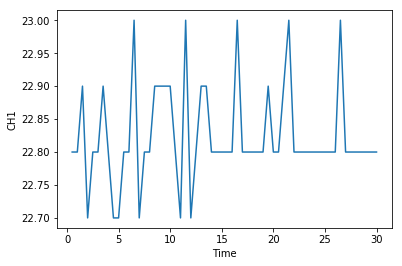

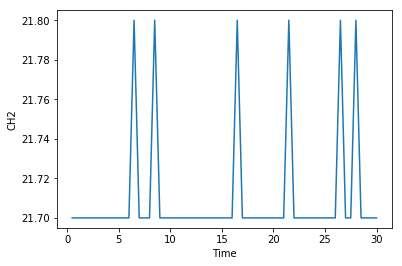

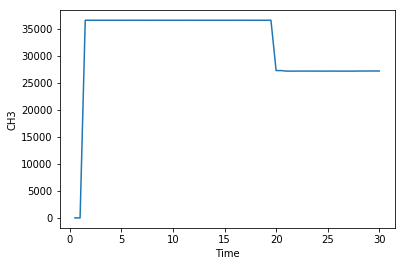

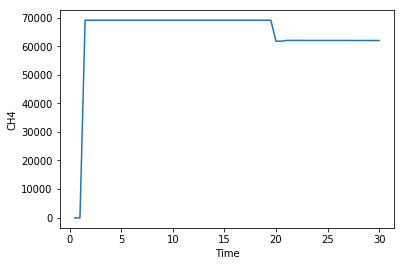

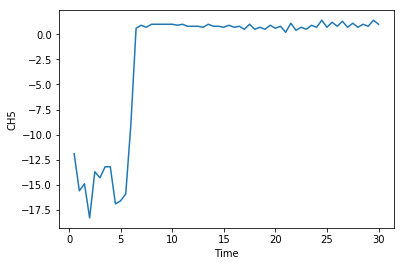

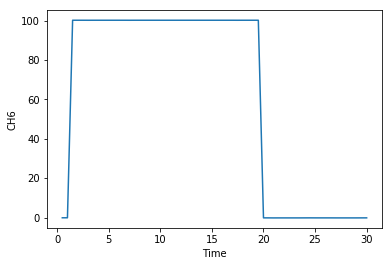

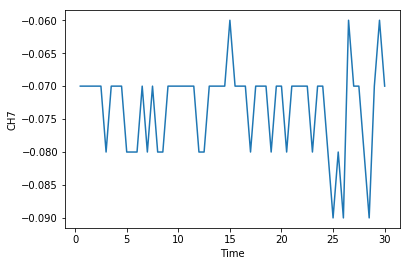

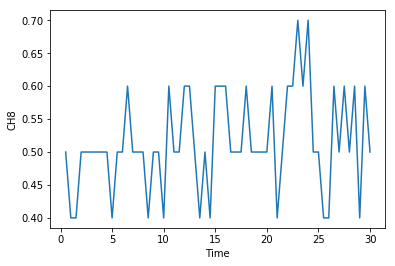

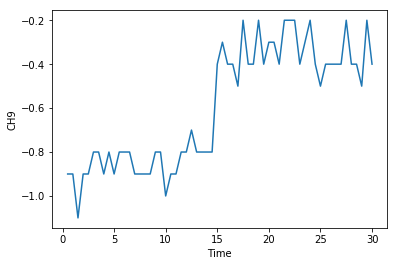

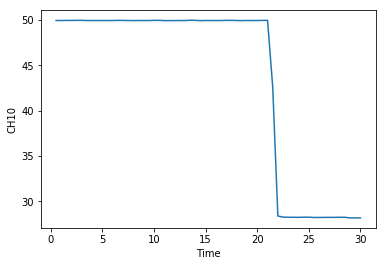

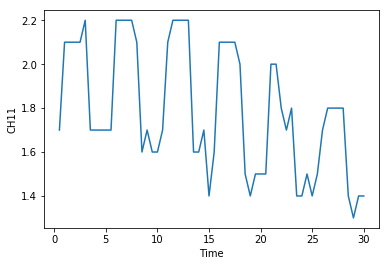

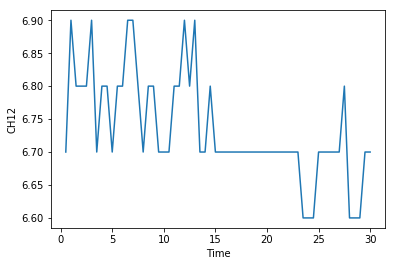

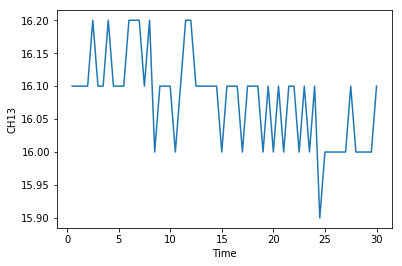

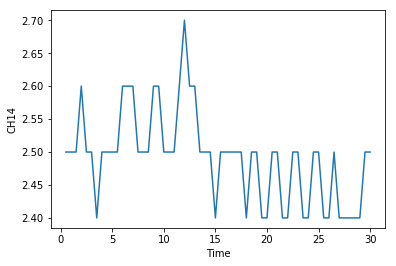

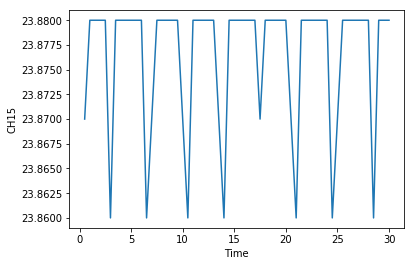

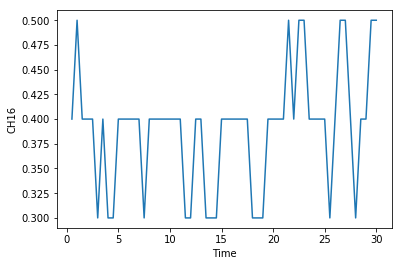

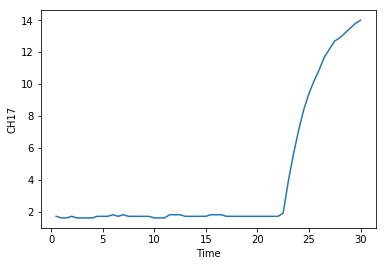

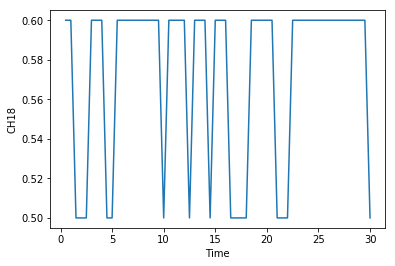

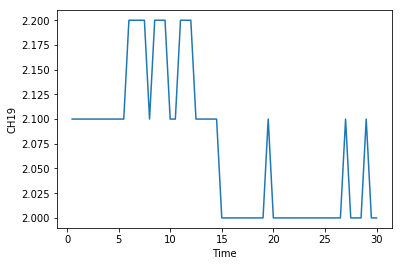

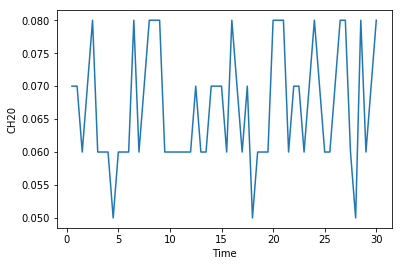

In [319]:
# plotting 'CH1-20' for first 30 seconds
n=1
while n!=21:
    j=str(n)
    plt.figure(n)
    plt.xlabel('Time')
    plt.ylabel('CH' + j)

    plt.plot((pd.to_numeric((df2["Number"])))/2, df['CH' + j])
    plt.show()
   # plt.savefig('CH' + j)
    n += 1

 CH1, "TA_EXT_113” = external temperature in degrees Celsius
     
 
 
  CH2, "TA_INT” = internal tram temperature in degrees Celsius
  
  CH3, "LONGITUDE" = longitude of the tram position. It will be in degrees units after applying the calibration relation.
  
  CH4, "LATITUDE" = latitude of the tram position. It will be in degrees units after applying the calibration relation. 
  
  CH5, "P_Diff" = filter pressure drop in the HVAC system (not interesting for us)
  
  CH6, "VITESSE" = tram speed in km/h
  
  CH7, "I_HVAC_AC1" = DC current 1 of the Heating, Ventilation and Air-Conditioning system in A units
  
  CH8,9 "I_TCU2" = traction current in A units
  
  CH10, "CO2" = CO2 level inside the tram to have a rough estimate of the passenger number. In ppm units once the correction applied.
  
  CH11, "I_RHEO_22" = rheostat current 2 at the roof panel 2 in A units
  
  CH12, "I_RHEO_21" = rheostat current 2 at the roof panel 1 in A units
  
  CH13, "I_RHEO_12” = rheostat current 1 at the roof panel 2 in A units
  
  CH14, "I_RHEO_11" = rheostat current 1 at the roof panel 1 in A units
  
  CH15, "U_CTPP" = indicates whether the power comes from the overhead line (“catenaire” in French) when > 12V or from the third rail on the ground (“alimentation par le sol = APS” in French) when <12V
                                       Notice that indeed the Reims tramway is mostly powered through the overhead line except for the central part of the route (in the city centre) where it is powered for about 2 km through the third rail (see the Map_tramway_reims.png). 
  CH16, "I_CAT" = overhead line current in A units. Notice that during traction I_CAT < 0 (consumed energy) while when I_CAT > 0 the energy is recovered from the braking. 
  
  CH17, "U_CAT" = overhead line voltage in V units
  
  CH18, "I_CVS" = power converter current in A units
  
  CH19, "U_HVAC_AC” = voltage of the Heating, Ventilation and Air-Conditioning system in V units
  
  CH20, "I_HVAC_AC2" = DC current 2 of the Heating, Ventilation and Air-Conditioning system in A units
 

## Calculating offsets and converting data with given equation

In [320]:
x=df.mean() # offset

In [321]:
# offset for data that are not stationary in first 30 seconds
x['CH9'] = (pd.DataFrame(df)[:29]).mean()['CH9']
x['CH17'] = (pd.DataFrame(df)[:42]).mean()['CH17']

In [322]:
# dictionary for rescale function- use as x.

factor = {'CH1': 0, 'CH2': 0,
          'CH3': [36490/(5+4.959),4.959*36490/(5+4.959)],
          'CH4': [36490/(5+4.959),4.959*36490/(5+4.959)],
          'CH5': [1000/(4.8-0.96),-0.96*1000/(4.8-0.96)],
          'CH6': [100/(4.989+4.926),4.926*100/(4.989+4.926)],
          'CH7': [25,-25],
          'CH8': 100,
          'CH9':100, 
          'CH10': 20,
          'CH11': 100,
          'CH12': 100,
          'CH13': 100,
          'CH14': 100,
          'CH15': 0,
          'CH16': 400, 
          'CH17': 150 ,
          'CH18': 400,
          'CH19': 894/2,
          'CH20': [25,-25]}

In [323]:
# x is float factor or list of factor and value at 0, take x from factor
# dataframe in our case df2
# column is string that tels us the column in data frame

def rescale(x, dataframe, column):
    if column in ['CH20', 'CH7', 'CH3', 'CH4', 'CH5','CH6']  :
        dataframe[column] = dataframe[column] * x[0] + x[1]        
                
    elif column in ['CH15','CH1', 'CH2']:
        pass
    
    else:
        dataframe[column] = dataframe[column] * x 
        
    

In [324]:
# Making dict of offsets

dict_offset = dict()

for i, mean in enumerate(df.mean()):
    dict_offset ["CH" + str(i - 1)] = mean
    
dict_offset["CH9"] = (pd.DataFrame(df)[:30]).mean()['CH9']

In [325]:
#Calculating easch sensor. At first we create new dataframe (copy of original dataframe).


df2["CH3"] = round(4.0325 - df2["CH3"] / 1000000, 8)
df2["CH4"] = round(49.285 - df2["CH4"] / 1000000, 8)

#Mistake in equation image?
df2["CH6"] = abs(round(df["CH6"], 1))

df2["CH8"] = (df2["CH8"] - dict_offset["CH8"]) * 1.159
df2["CH9"] = (df2["CH9"] - dict_offset["CH9"]) * 1.159
df2["CH10"] = df2["CH10"] * 20
# df_calc["CH11"] = round(df["CH11"], 1) - dict_offset["CH11"]

In [326]:
# calibration only with offset
only_offset = ['CH7','CH11','CH12','CH13','CH14','CH16','CH17', 'CH18','CH19','CH20']

#for i in range(20):
#    rescale(factor['CH' + str(i+1)], df2, 'CH' + str(i+1))

for y in only_offset:    
    df2[y] = (df2[y] - x[y])
    
    if y == 'CH17':
        df2[y] = round(df2[y], 0)
    else:
        df2[y] = round(df2[y], 1)
    

# df2['CH8'] = (df['CH8'] - x['CH8'])*1.159
# df2['CH9'] = (df['CH9'] - x['CH9'])*1.159

In [327]:
df2

,Number,Date&Time,ms,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20
1,1,2017-08-30 04:36:30.000,0,22.8,21.7,4.032565,49.285121,-11.9,0.1,0.0,1.265242,-0.06954,998.4,-0.1,-0.0,0.0,0.0,23.87,0.0,0.0,0.0,0.0,0.0
2,2,2017-08-30 04:36:30.500,500,22.8,21.7,4.032565,49.285121,-15.6,0.1,0.0,1.149342,-0.06954,998.4,0.3,0.2,0.0,0.0,23.88,0.1,-0.0,0.0,0.0,0.0
3,3,2017-08-30 04:36:31.000,0,22.9,21.7,3.995956,49.215917,-14.9,100.2,0.0,1.149342,-0.30134,998.6,0.3,0.1,0.0,0.0,23.88,0.0,-0.0,-0.1,0.0,-0.0
4,4,2017-08-30 04:36:31.500,500,22.7,21.7,3.995958,49.215917,-18.3,100.2,0.0,1.265242,-0.06954,998.6,0.3,0.1,0.0,0.1,23.88,0.0,0.0,-0.1,0.0,0.0
5,5,2017-08-30 04:36:32.000,0,22.8,21.7,3.995957,49.215917,-13.7,100.2,0.0,1.265242,-0.06954,998.8,0.3,0.1,0.1,0.0,23.88,0.0,-0.0,-0.1,0.0,0.0
6,6,2017-08-30 04:36:32.500,500,22.8,21.7,3.995958,49.215917,-14.3,100.2,-0.0,1.265242,0.04636,998.8,0.4,0.2,0.0,0.0,23.86,-0.1,-0.0,0.0,0.0,-0.0
7,7,2017-08-30 04:36:33.000,0,22.9,21.7,3.995958,49.215917,-13.2,100.2,0.0,1.265242,0.04636,998.4,-0.1,-0.0,0.0,-0.1,23.88,0.0,-0.0,0.0,0.0,-0.0
8,8,2017-08-30 04:36:33.500,500,22.8,21.7,3.995958,49.215917,-13.2,100.2,0.0,1.265242,-0.06954,998.4,-0.1,0.1,0.1,0.0,23.88,-0.1,-0.0,0.0,0.0,-0.0
9,9,2017-08-30 04:36:34.000,0,22.7,21.7,3.995958,49.215917,-16.9,100.2,0.0,1.265242,0.04636,998.4,-0.1,0.1,0.0,0.0,23.88,-0.1,0.0,-0.1,0.0,-0.0
10,10,2017-08-30 04:36:34.500,500,22.7,21.7,3.995958,49.215917,-16.6,100.2,-0.0,1.149342,-0.06954,998.4,-0.1,-0.0,0.0,0.0,23.88,0.0,0.0,-0.1,0.0,-0.0


## Calculating power

Here we can see which variables are same.

E_TCU = U_CAT x (I_TCU1 + I_TCU2)

E_TCU = CH17 * ( ?? + CH8)

No data for I_TCU1



E_RHEO = U_CAT x ( I_RHEO_11 + I_RHEO_12 + I_RHEO_21 + I_RHEO_22)

E_RHEO = CH17 * (CH14 + CH13 + CH12 + CH11)


E_HVAC_AC = U_HVAC_AC x (I_HVAC_AC1 + I_HVAC_AC2)

E_HVAC_AC = CH19 * (CH7 + CH20)


E_CVS = U_CAT x I_CVS

E_CVS = CH17 * CH18


E_total = E_TCU[1-2] + E_HVAC_DC + E_CVS


No data for E_HVAC_DC
E_HVAC_DC ...E_HVAC_AC


Ou

E_total_CAT = U_CAT + I_CAT



E_total_CAT = CH17 * CH16 

In [328]:
df2 ["P_TCU"] = df2["CH17"] * (df2["CH8"]) # Missing I_TCU1

df2 ["P_RHEO"] = df2["CH17"] * (df2["CH14"] + df2["CH13"] + df2["CH12"] + df2["CH11"])

df2 ["P_HVAC_AC"] =df2["CH19"] * (df2["CH7"] + df2["CH20"])

df2 ["P_CSV"] = df2["CH17"] * df2["CH18"]

df2 ["P_total_CAT_1"] =  df2["P_TCU"] + df2["P_HVAC_AC"] + df2["P_CSV"]

df2 ["P_total_CAT_2"] =  df2["CH17"] * df2["CH16"]

## Drawing graphs of power 

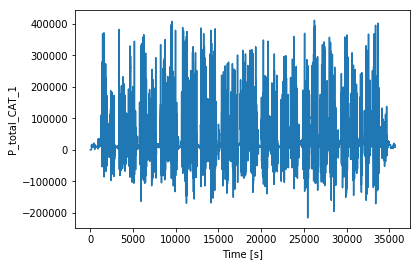

In [329]:
plt.figure(2)
plt.xlabel("Time [s]")
plt.ylabel("P_total_CAT_1")
plt.plot((pd.to_numeric((df2["Number"])) / 2), df2["P_total_CAT_1"])
plt.show()

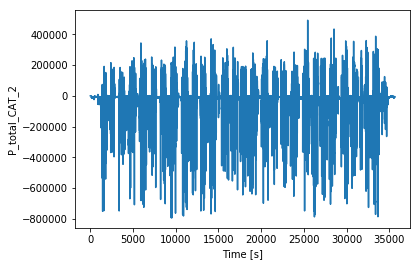

In [330]:
plt.figure(3)
plt.xlabel("Time [s]")
plt.ylabel("P_total_CAT_2")
plt.plot((pd.to_numeric((df2["Number"])) / 2), df2["P_total_CAT_2"])
plt.show()

## Calculating speed and accleration

In [331]:
# Display more data to show.

pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',30)
pd.set_option('display.width',30)

height has been deprecated.



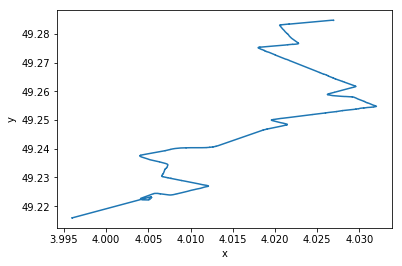

In [332]:
# Ploting GPS data.

plt.figure(4)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(df2["CH3"][3:6000], df2["CH4"][3:6000])
plt.show()

In [333]:
# from DataFrame df2 to list

lat = df2['CH4'].tolist()
lon = df2['CH3'].tolist()
points = []

# create list of points (goepy library)

for i in range(len(lat)):
    points.append(gp.Point(lat[i], lon[i]))
    

In [334]:
# calculate difference between sequential pionts and speed

from geopy.distance import vincenty

# we start with speed as 0
diff_points = [0]

for i in range(len(lat)-1):
    diff_points.append(vincenty(points[i], points[i+1]).m)
    

# time diference is 0.5 second
t_diff = 0.5
speed = (np.asarray(diff_points)/t_diff).tolist()

# if speed is too high and probably not real set them to zero
for i in range(len(speed)):
    if speed[i] > 50:
        speed[i] = 0

In [335]:
df2['Speed']=speed

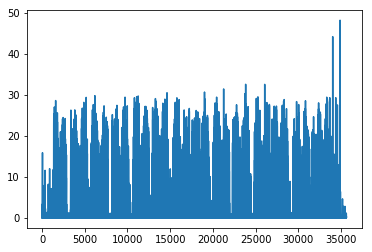

In [336]:
#graph of speed
plt.figure(5)
plt.plot((pd.to_numeric((df2["Number"])))/2, df2['Speed'])
plt.show()

In [337]:
#calculate acclereration from speed
diff_speed = df2["Speed"].diff().fillna(0.0)
df2["Acceleration"] = diff_speed / 0.5

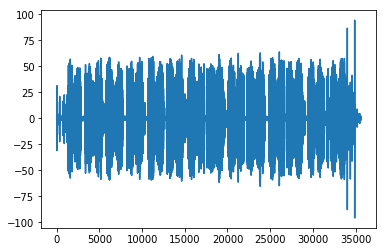

In [338]:
#graph of acceleration
plt.figure(6)
plt.plot(pd.to_numeric((df2["Number"]))/2, df2["Acceleration"])
plt.show()

## Calibrated data - plots

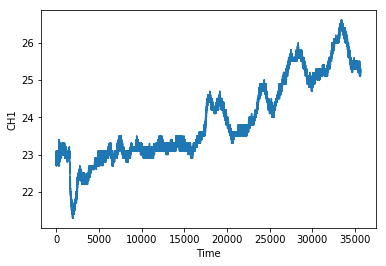

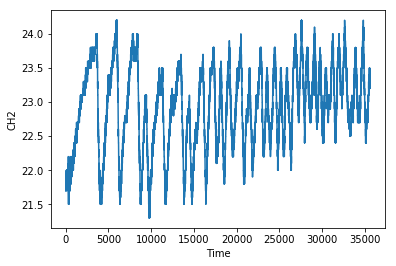

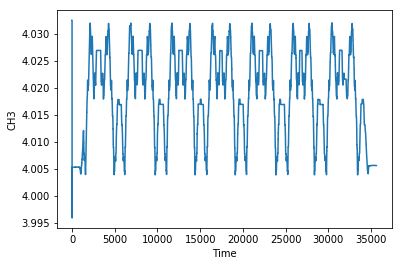

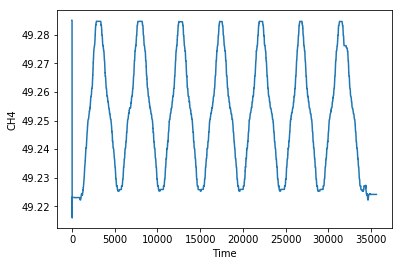

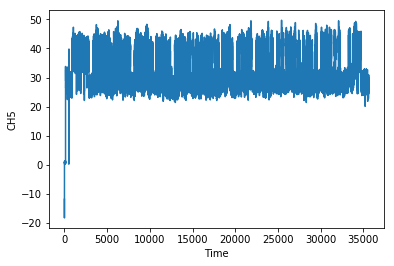

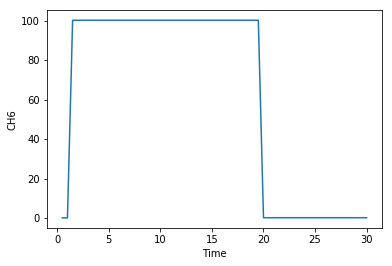

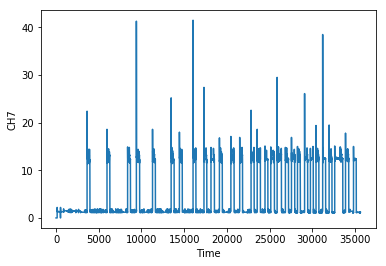

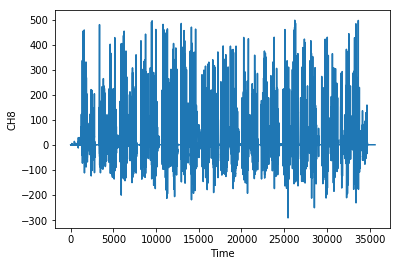

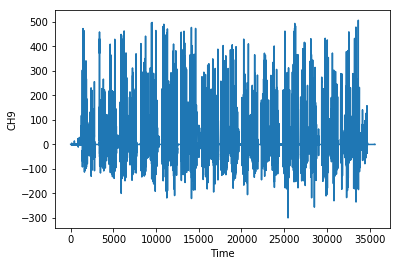

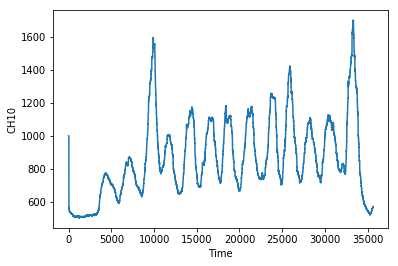

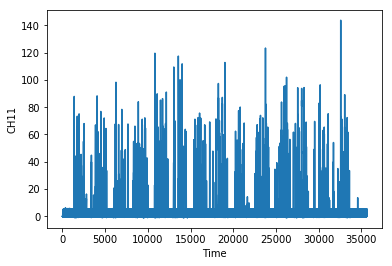

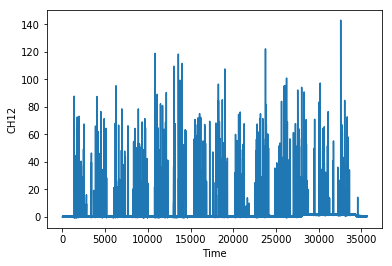

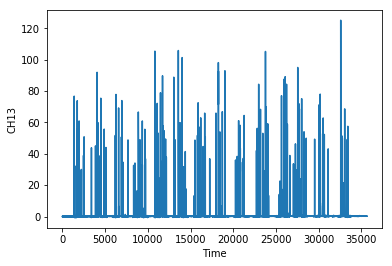

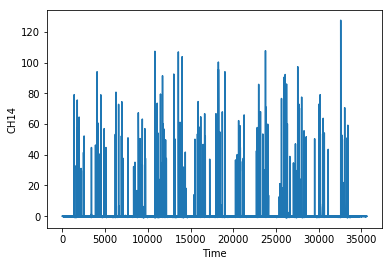

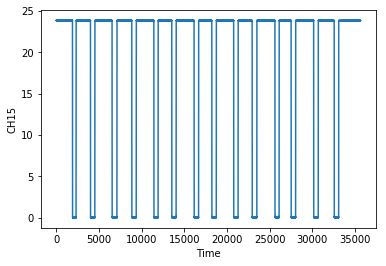

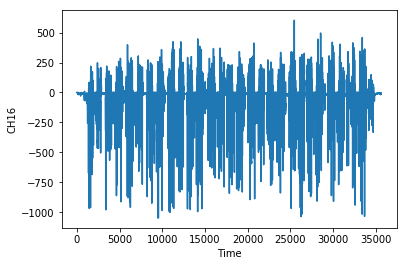

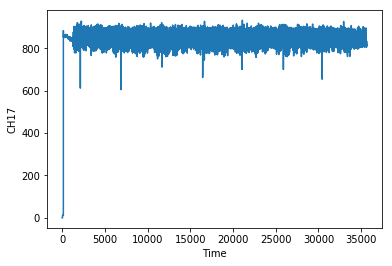

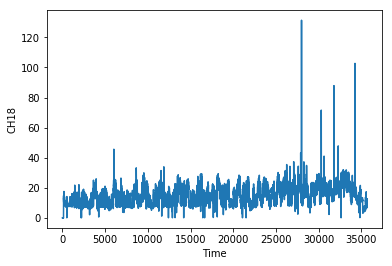

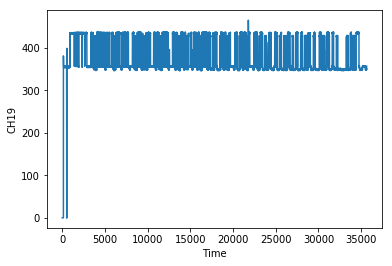

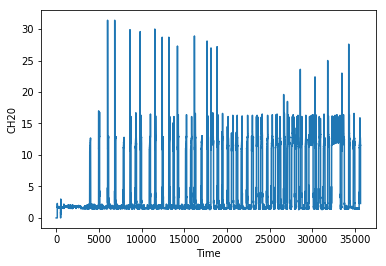

In [339]:
n=1
while n!=21:
    j=str(n)
    plt.figure(n)
    plt.xlabel('Time')
    plt.ylabel('CH' + j)

    plt.plot((pd.to_numeric((df2["Number"])))/2, df2['CH' + j])
    plt.show()
   # plt.savefig('CH' + j)
    n += 1

In [36]:
# speed and acceleration averaged over n/2 seconds (to see better on graphs)

speed2 = []
n=120
for i in range(int(71280/n)):
    speed2.append(sum(speed[n*i:n*i+n]))

speed2 = (np.asarray(speed2)/n).tolist()
    
diff_speed2 = (np.asarray(speed2[0:-1]) - np.asarray(speed2[1:])).tolist()
acceleration = (np.asarray(diff_speed2) / (0.5*n)).tolist()

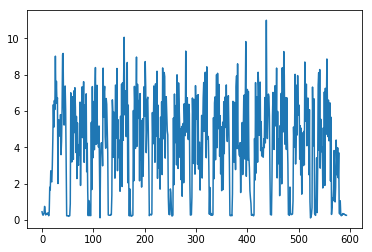

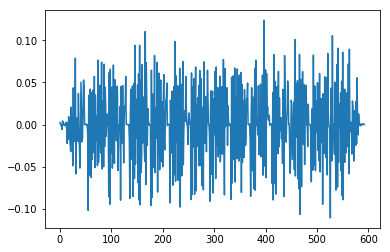

In [37]:
# plots x axis not in real units
plt.figure(3)
plt.plot(speed2)
plt.show()

plt.figure(2)
plt.plot(acceleration)
plt.show()

[0.0,
 0.0,
 0,
 0.29141931628320894,
 0.14570965814160447,
 0.14570965814160447,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.29141931628320894,
 0.29141931628320894,
 0.0,
 0.14570965814160447,
 0.14570965814160447,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4681109663327979,
 0.36660517235832324,
 0.26590495545777737,
 0.0,
 0.4448556770566465,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4448556770566465,
 0.4681109668187756,
 0.14570965814160447,
 0.0,
 0.0,
 0.6672835152507749,
 0.2224278374870288,
 0.0,
 0,
 0.0,
 0,
 0.6236379762368695,
 1.2555718488133547,
 0.0,
 3.3364216764594414,
 0.14568885486265623,
 1.0997168537463693,
 0.4448562265925299,
 1.4562546065085413,
 0.4448562236609087,
 0.9808190313607911,
 0.4370666262062471,
 2.4639981846652415,
 0.0,
 2.196342792627147,
 0.14568882840517236,
 2.3898817624375552,
 0.14568879900796386,
 0.14568879900796386,
 0.14568879900796386,
 0.0,
 0.14568879900796386,
 0.2913775980159277,
 0.14568879900796386,
 0.0,
 0.14568879900796386,
 0.1456887991238067,
 0.46810499

# Time series basic visualization and basic values

In [98]:
#create list that contain basic valuses for time series 
t = 300    #time series for t seconds
basic_values = []

for i in range(int(71280/(2*t))):
    df_series = pd.DataFrame(df2)[2*t*i:2*t*i+2*t].copy(deep=True)
    basic_values.append(df_series.describe())
    
# plotting time series
    
#   n=1
#   while n!=21:
#       j=str(n)
#       plt.figure(n)
#       plt.xlabel('Time')
#       plt.ylabel('CH' + j)

#       plt.plot((pd.to_numeric((df_series["Number"])))/2, df_series['CH' + j])
#       plt.show()
#      # plt.savefig('CH' + j)
#       n += 1
    

In [73]:
basic_values[3]

,ms,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,P_TCU,P_RHEO,P_HVAC_AC,P_CSV,P_total_CAT_1,P_total_CAT_2,Speed,Acceleration
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,0.0,600.000000,600.000000,600.000000,600.000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,250.000000,23.056500,22.336500,4.005268,49.223271,39.432667,NaN,1.500167,11.330384,-41.734817,509.934,0.957167,0.082667,0.013667,-0.136500,23.866233,-31.757667,840.363333,10.848167,434.417167,1.855500,9509.017013,770.813833,1457.757433,9116.186667,20082.961113,-26661.656000,2.075899,0.009545
std,250.208594,0.068792,0.096609,0.000896,0.000849,2.227188,NaN,0.004082,5.660024,5.718457,3.259,2.244804,0.220334,0.069194,0.076338,0.008140,11.423452,2.736873,0.834940,1.138588,0.049738,4734.082697,2108.905250,21.957567,698.569684,4796.871905,9533.151842,2.026225,7.698444
min,0.000000,22.900000,22.100000,4.004072,49.222150,26.800000,NaN,1.500000,-0.357358,-53.846754,501.000,-0.500000,-0.200000,-0.200000,-0.300000,23.840000,-69.000000,832.000000,7.100000,426.100000,1.800000,-301.610433,-834.000000,1428.240000,5956.900000,9966.566767,-57546.000000,0.000000,-13.394984
25%,0.000000,23.000000,22.300000,4.004546,49.222458,37.975000,NaN,1.500000,7.060242,-45.994529,506.800,-0.300000,-0.000000,0.000000,-0.200000,23.870000,-39.450000,839.000000,10.400000,433.400000,1.800000,5950.018665,-417.000000,1434.510000,8725.600000,16323.664052,-33137.850000,0.222428,-6.856336
50%,250.000000,23.100000,22.400000,4.005123,49.223064,39.500000,NaN,1.500000,12.275742,-41.097754,510.400,-0.100000,-0.000000,0.000000,-0.100000,23.870000,-33.400000,840.000000,10.800000,434.400000,1.900000,10323.898742,-168.200000,1472.200000,9119.250000,20955.873629,-28089.400000,0.901562,-0.020398
75%,500.000000,23.100000,22.400000,4.005820,49.224148,40.900000,NaN,1.500000,15.289142,-37.620754,513.000,0.000000,-0.000000,0.100000,-0.100000,23.870000,-23.375000,842.000000,11.200000,435.500000,1.900000,12842.879000,0.000000,1477.980000,9419.200000,23523.672631,-19639.575000,3.769741,6.950774
max,500.000000,23.300000,22.600000,4.007428,49.224466,47.300000,NaN,1.600000,30.124342,-23.365054,515.200,5.600000,0.700000,0.200000,0.000000,23.870000,-5.900000,848.000000,16.100000,436.200000,1.900000,25093.576608,5298.300000,1491.350000,13507.900000,36070.816608,-4979.600000,7.142348,13.752911


# Kalman filter for speed and accelaration

In [563]:
# initial state
x = np.matrix([[lon[0], lat[0], 0.0, 0.0, 0.0, 0.0]]).T
n=x.size # States

# initial uncertainty
P = np.diag([0.01, 0.01, 0, 0, 0, 0])

In [564]:
# dinamic matrix
dt = 0.5 # Time Step

A = np.matrix([[1.0, 0.0, dt, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 1.0, 0.0, dt, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 1.0, 0.0, dt, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

In [565]:
# measurement matrix

H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [566]:
# measurement noise covariance

rp = 0.001  # Noise of Position Measurement

R = np.matrix([[rp, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, rp, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [573]:
#noise covariance matrix
sa = 0.00000001
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [1.0],
               [1.0]])
Q = G*G.T*sa**2

In [574]:
K = np.eye(6)
I = np.eye(6)
x_kalman = []

for i in range(len(df2)):
    
    z = np.matrix([lon[i],lat[i],0,0,0,0]).T
    
    x = A * x
    P = A * P * A.T + Q
    
    K = P * H.T * np.linalg.pinv(H * P * H.T + R)
    x = x + K * (z - H * x)
    P = (I - K * H) * P
    
    x_kalman.append(x.T.tolist()[0])
    

In [575]:
lon_kalman = [el[0] for el in x_kalman]
lat_kalman = [el[1] for el in x_kalman]
lon_speed = [el[2] for el in x_kalman]
lat_speed = [el[3] for el in x_kalman]
lon_acc = [el[4] for el in x_kalman]
lat_acc = [el[5] for el in x_kalman]

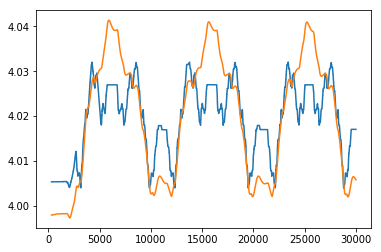

In [576]:
r = 30000
s=300
plt.figure(1)
plt.plot( range(r)[s:],  lon[s:r], range(r)[s:], lon_kalman[s:r])
plt.show()

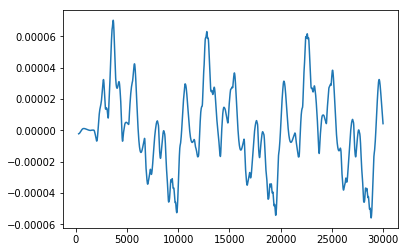

In [577]:
plt.figure(1)
plt.plot( range(r)[s:], lon_speed[s:r] )
plt.show()

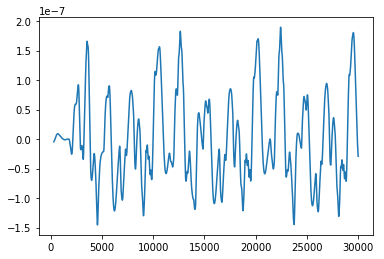

In [578]:
plt.figure(1)
plt.plot( range(r)[s:], lon_acc[s:r] )
plt.show()